In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maztl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cluster_mpg.csv')

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [5]:
df_dummies=pd.get_dummies(df.drop('name',axis=1))

In [17]:
df_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df_dummies)
scaled_data  # between 0~1

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [11]:
scaled_df=pd.DataFrame(scaled_data,columns=df_dummies.columns)

<Figure size 1200x700 with 0 Axes>

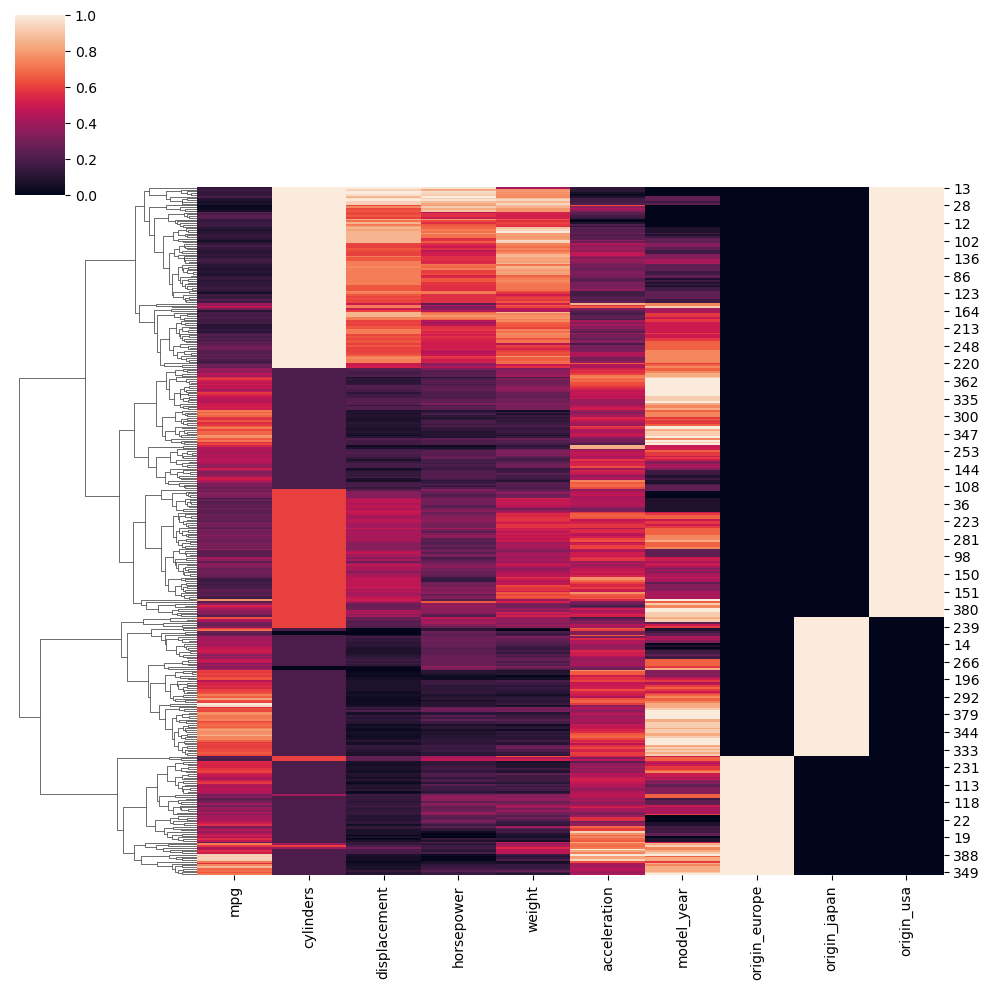

In [16]:
plt.figure(figsize=(12,7),dpi=100)
sns.clustermap(scaled_df,col_cluster=False)